In [81]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

In [83]:
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [84]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df=train.copy()
test_df=test.copy()

In [85]:
df.head()


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [87]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [88]:

df['weather'].unique()



array([1, 2, 3, 4], dtype=int64)

In [89]:
df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

/* A SHORT DESCRIPTION OF THE FEATURES.
datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated */

In [90]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [91]:

import missingno as msno

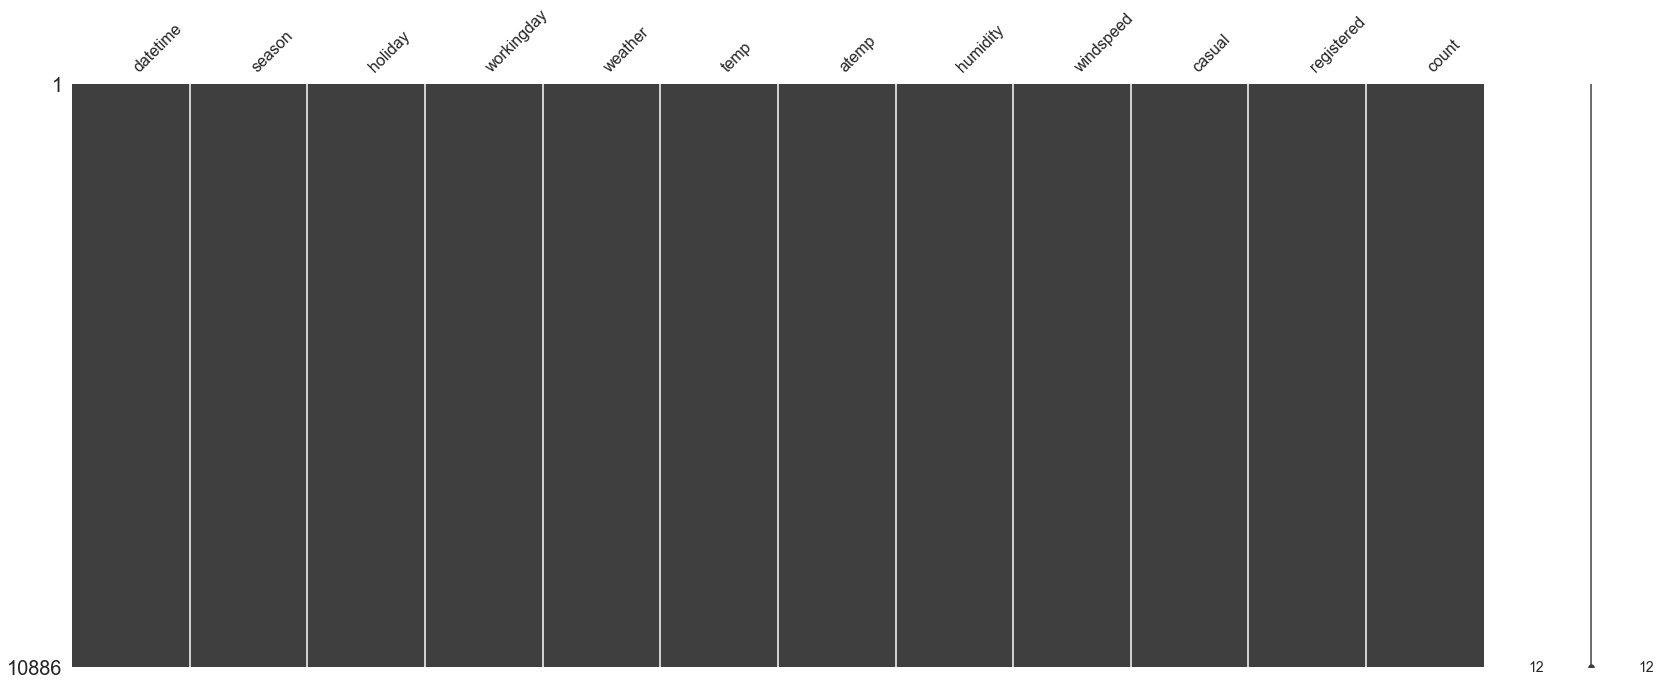

In [92]:
msno.matrix(df)

In [93]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [94]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

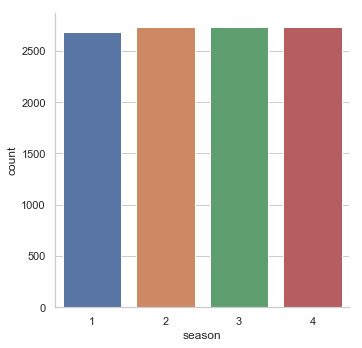

In [95]:
sns.factorplot(x='season',data=df,kind='count')

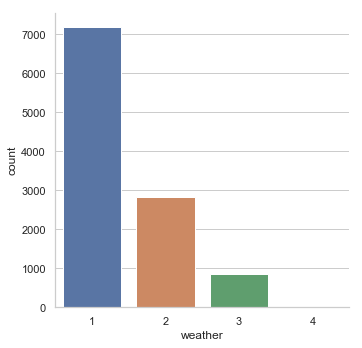

In [96]:
sns.factorplot(x='weather',data=df,kind='count')

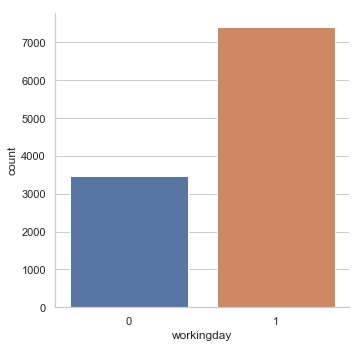

In [97]:
sns.factorplot(x='workingday',data=df,kind='count')

In [98]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

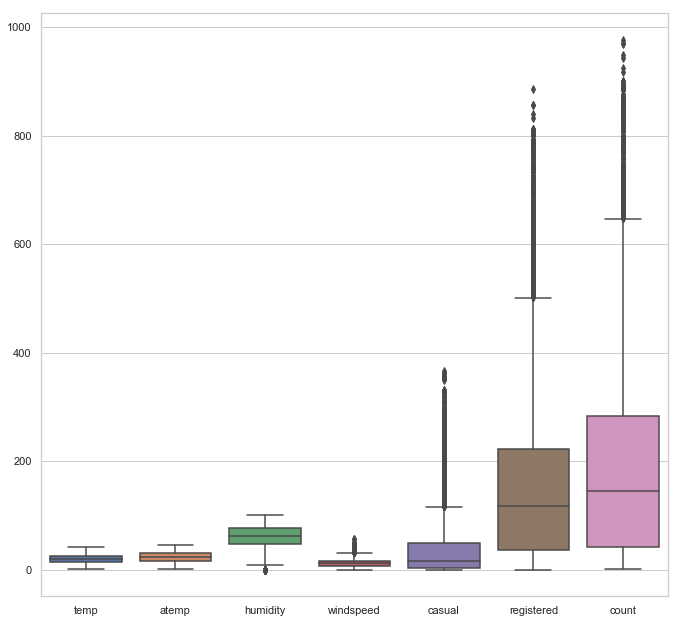

In [99]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [100]:
df.temp.unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [101]:
cor_mat=df[:].corr()

In [102]:
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False


In [103]:
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [104]:
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  weather_1  weather_2  \
0        81        0.0       3          13     16          1          0   
1        80        0.0       8          32     40          1          0   
2        80        0.0       5          27     32          1          0   
3        75        0.0       3          10     13          1          0   
4        75        0.0       0           1      1          1          0   

   weather_3  weather_4  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0

In [105]:
test_df.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  weather_1  weather_2  weather_3  weather_4  
0        56    26.0027          1          0          0          0  
1        56     0.0000          1          0          0          0  
2        56     0.0000          1          0          0          0  
3        56    11.0014          1          0          0          0  
4        56    11.0014          1          0          0          0

In [106]:
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)

In [107]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  weather_1  weather_2  \
0        81        0.0       3          13     16          1          0   
1        80        0.0       8          32     40          1          0   
2        80        0.0       5          27     32          1          0   
3        75        0.0       3          10     13          1          0   
4        75        0.0       0           1      1          1          0   

   weather_3  weather_4  season_1  season_2  season_3  season_4  
0          0          0         1         0         0         0  
1          0          0         1         0         0         0  
2          0          0         1         0         0         0  
3          0          0         1         0         0         0  
4          0          0         1         0         0         0

In [108]:
df.drop(['season','weather'],inplace=True,axis=1)
test_df.drop(['season','weather'],inplace=True,axis=1)
df.head()

datetime  holiday  workingday  temp   atemp  humidity  \
0  2011-01-01 00:00:00        0           0  9.84  14.395        81   
1  2011-01-01 01:00:00        0           0  9.02  13.635        80   
2  2011-01-01 02:00:00        0           0  9.02  13.635        80   
3  2011-01-01 03:00:00        0           0  9.84  14.395        75   
4  2011-01-01 04:00:00        0           0  9.84  14.395        75   

   windspeed  casual  registered  count  weather_1  weather_2  weather_3  \
0        0.0       3          13     16          1          0          0   
1        0.0       8          32     40          1          0          0   
2        0.0       5          27     32          1          0          0   
3        0.0       3          10     13          1          0          0   
4        0.0       0           1      1          1          0          0   

   weather_4  season_1  season_2  season_3  season_4  
0          0         1         0         0         0  
1          0         1         0         0         0  
2          0         1         0         0         0  
3          0         1         0         0         0  
4          0         1         0         0         0

In [109]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()


datetime  holiday  workingday  temp   atemp  humidity  \
0  2011-01-01 00:00:00        0           0  9.84  14.395        81   
1  2011-01-01 01:00:00        0           0  9.02  13.635        80   
2  2011-01-01 02:00:00        0           0  9.02  13.635        80   
3  2011-01-01 03:00:00        0           0  9.84  14.395        75   
4  2011-01-01 04:00:00        0           0  9.84  14.395        75   

   windspeed  casual  registered  count  ...  weather_3  weather_4  season_1  \
0        0.0       3          13     16  ...          0          0         1   
1        0.0       8          32     40  ...          0          0         1   
2        0.0       5          27     32  ...          0          0         1   
3        0.0       3          10     13  ...          0          0         1   
4        0.0       0           1      1  ...          0          0         1   

   season_2  season_3  season_4  hour  day  month  year  
0         0         0         0     0    5      1     0  
1         0         0         0     1    5      1     0  
2         0         0         0     2    5      1     0  
3         0         0         0     3    5      1     0  
4         0         0         0     4    5      1     0  

[5 rows x 22 columns]

In [110]:
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = test_df['year'].map({2011:0, 2012:1})
test_df.head()

datetime  holiday  workingday   temp   atemp  humidity  \
0  2011-01-20 00:00:00        0           1  10.66  11.365        56   
1  2011-01-20 01:00:00        0           1  10.66  13.635        56   
2  2011-01-20 02:00:00        0           1  10.66  13.635        56   
3  2011-01-20 03:00:00        0           1  10.66  12.880        56   
4  2011-01-20 04:00:00        0           1  10.66  12.880        56   

   windspeed  weather_1  weather_2  weather_3  weather_4  season_1  season_2  \
0    26.0027          1          0          0          0         1         0   
1     0.0000          1          0          0          0         1         0   
2     0.0000          1          0          0          0         1         0   
3    11.0014          1          0          0          0         1         0   
4    11.0014          1          0          0          0         1         0   

   season_3  season_4  hour  day  month  year  
0         0         0     0    3      1     0  
1         0         0     1    3      1     0  
2         0         0     2    3      1     0  
3         0         0     3    3      1     0  
4         0         0     4    3      1     0

In [111]:
df.drop('datetime',axis=1,inplace=True)
df.head()


holiday  workingday  temp   atemp  humidity  windspeed  casual  registered  \
0        0           0  9.84  14.395        81        0.0       3          13   
1        0           0  9.02  13.635        80        0.0       8          32   
2        0           0  9.02  13.635        80        0.0       5          27   
3        0           0  9.84  14.395        75        0.0       3          10   
4        0           0  9.84  14.395        75        0.0       0           1   

   count  weather_1  ...  weather_3  weather_4  season_1  season_2  season_3  \
0     16          1  ...          0          0         1         0         0   
1     40          1  ...          0          0         1         0         0   
2     32          1  ...          0          0         1         0         0   
3     13          1  ...          0          0         1         0         0   
4      1          1  ...          0          0         1         0         0   

   season_4  hour  day  month  year  
0         0     0    5      1     0  
1         0     1    5      1     0  
2         0     2    5      1     0  
3         0     3    5      1     0  
4         0     4    5      1     0  

[5 rows x 21 columns]

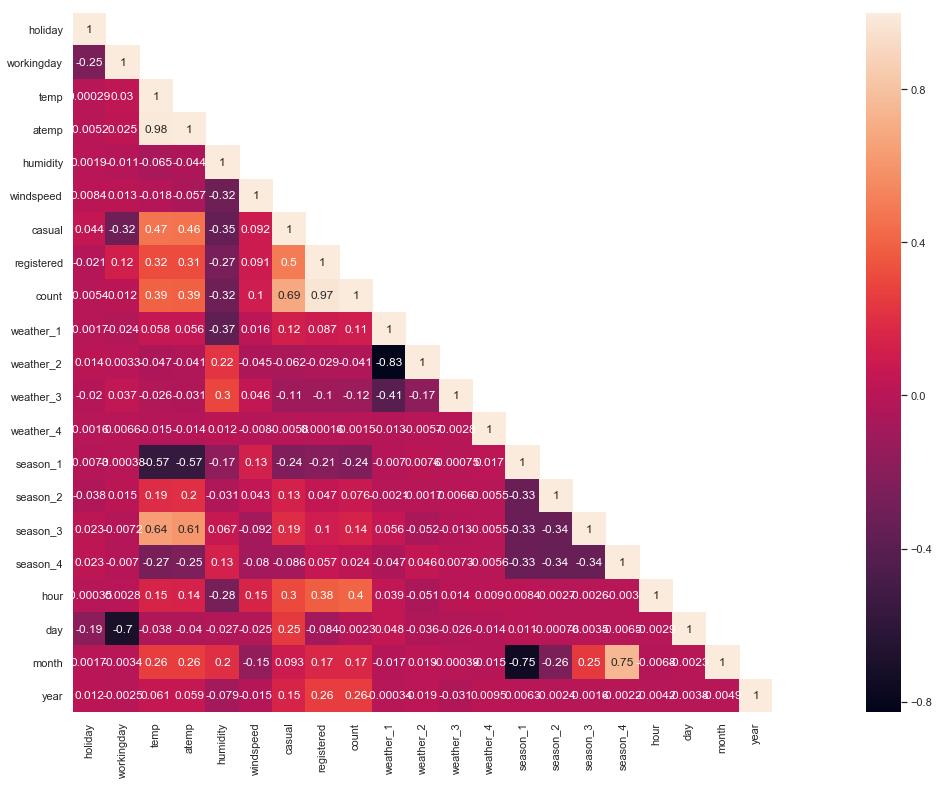

In [144]:
corr_mat=df[:].corr()
mask=np.array(corr_mat)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=corr_mat,mask=mask,square=True,annot=True,cbar=True)

In [145]:
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

holiday  workingday  temp   atemp  humidity  windspeed  count  weather_1  \
0        0           0  9.84  14.395        81        0.0     16          1   
1        0           0  9.02  13.635        80        0.0     40          1   
2        0           0  9.02  13.635        80        0.0     32          1   
3        0           0  9.84  14.395        75        0.0     13          1   
4        0           0  9.84  14.395        75        0.0      1          1   

   weather_2  weather_3  weather_4  season_1  season_2  season_3  season_4  \
0          0          0          0         1         0         0         0   
1          0          0          0         1         0         0         0   
2          0          0          0         1         0         0         0   
3          0          0          0         1         0         0         0   
4          0          0          0         1         0         0         0   

   hour  day  month  year  
0     0    5      1     0  
1     1    5      1     0  
2     2    5      1     0  
3     3    5      1     0  
4     4    5      1     0

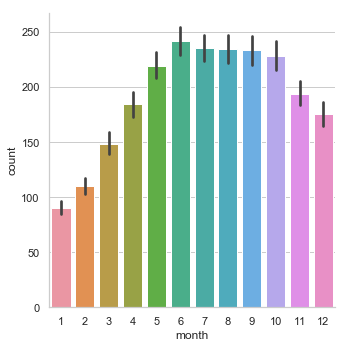

In [146]:
sns.factorplot(x='month',y='count',data=df,kind='bar')

In [147]:
df_cpy=df.copy()
df_cpy.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [148]:
df_cpy.temp.unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [149]:
df_cpy['temp_bin']=np.floor(df_cpy['temp'])//5
df_cpy.temp_bin.unique()

array([1., 2., 3., 0., 4., 5., 6., 7., 8.])

In [150]:
df_cpy.humidity.describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [151]:
df_cpy['hum_bins']=np.floor(df_cpy['humidity'])//10
df_cpy.hum_bins.unique()

array([ 8.,  7.,  9., 10.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

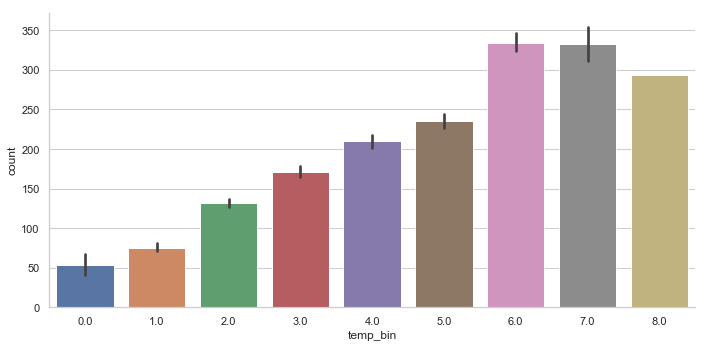

In [152]:
sns.factorplot(x='temp_bin',y='count',data=df_cpy,kind='bar',size=5,aspect=2)

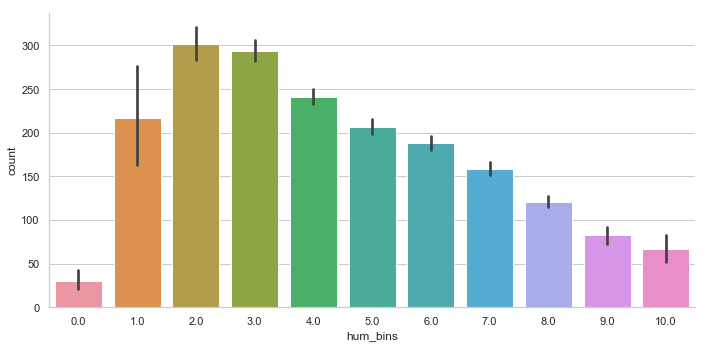

In [153]:
sns.factorplot(x='hum_bins',y='count',data=df_cpy,kind='bar',size=5,aspect=2)

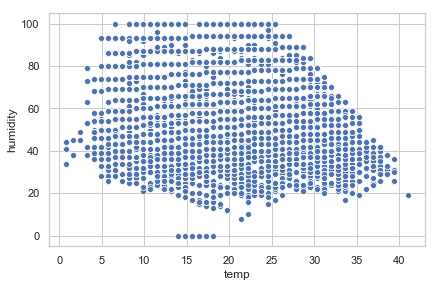

In [154]:
sns.scatterplot(x='temp',y='humidity',data=df_cpy)

In [155]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('uint8'): Index(['weather_1', 'weather_2', 'weather_3', 'weather_4', 'season_1',
        'season_2', 'season_3', 'season_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month',
        'year'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

In [156]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [157]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_log_error,mean_squared_error,r2_score,mean_absolute_error

In [158]:
df.head()

holiday  workingday  temp   atemp  humidity  windspeed  count  weather_1  \
0        0           0  9.84  14.395        81        0.0     16          1   
1        0           0  9.02  13.635        80        0.0     40          1   
2        0           0  9.02  13.635        80        0.0     32          1   
3        0           0  9.84  14.395        75        0.0     13          1   
4        0           0  9.84  14.395        75        0.0      1          1   

   weather_2  weather_3  weather_4  season_1  season_2  season_3  season_4  \
0          0          0          0         1         0         0         0   
1          0          0          0         1         0         0         0   
2          0          0          0         1         0         0         0   
3          0          0          0         1         0         0         0   
4          0          0          0         1         0         0         0   

   hour  day  month  year  
0     0    5      1     0  
1     1    5      1     0  
2     2    5      1     0  
3     3    5      1     0  
4     4    5      1     0

In [159]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

In [160]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor(),SVR()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor','SVR']
rmsle=[]
d={}
for model in range (len(models)):
    c=models[model]
    c.fit(x_train,y_train)
    test_predict=c.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_predict,y_test)))
d={'modelling_algo':model_names,'RMSLE':rmsle}
d

{'modelling_algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor',
  'SVR'],
 'RMSLE': [0.3347844716040599,
  1.0527377146303163,
  0.32958945134732265,
  0.8616609594892403,
  1.4341690757701235]}

In [161]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

modelling_algo     RMSLE
0  RandomForestRegressor  0.334784
1      AdaBoostRegressor  1.052738
2       BaggingRegressor  0.329589
3    KNeighborsRegressor  0.861661
4                    SVR  1.434169

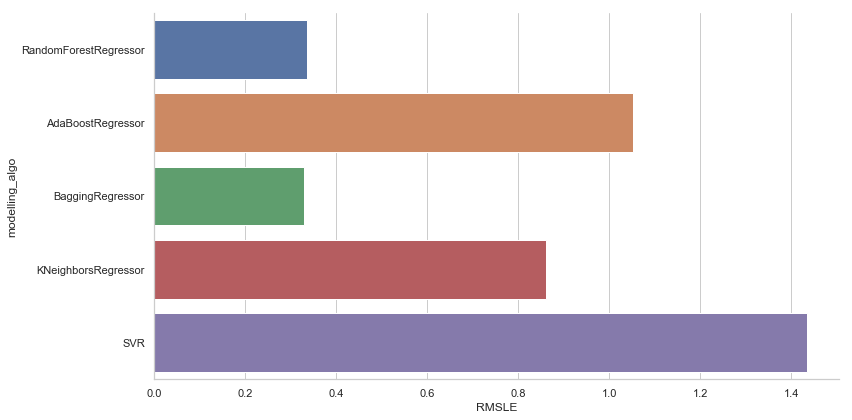

In [162]:
sns.factorplot(y='modelling_algo',x='RMSLE',data=rmsle_frame,kind='bar',size=6,aspect=2)

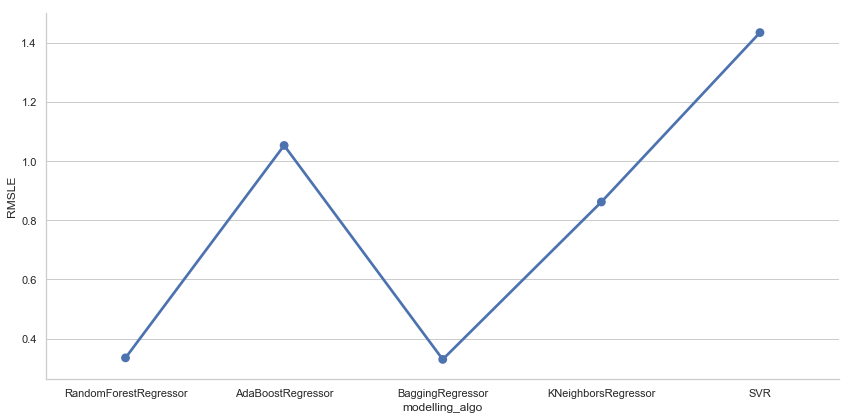

In [163]:
sns.factorplot(x='modelling_algo',y='RMSLE',data=rmsle_frame,kind='point',size=6,aspect=2)

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [165]:
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':['auto','sqrt','log2']}
m=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_error')
m.fit(x_train,y_train)
pred=m.predict(x_test)
print(np.sqrt(mean_squared_log_error(pred,y_test)))

0.3187976979698616


In [166]:
m.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [167]:
n_neighbors=[]
for i in range(0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
m_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
m_knn.fit(x_train,y_train)
pred_knn=m_knn.predict(x_test)
print(np.sqrt(mean_squared_log_error(pred_knn,y_test)))

0.8616609594892403


In [168]:
m_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 5}

In [169]:
test_df.head()

datetime  holiday  workingday   temp   atemp  humidity  \
0  2011-01-20 00:00:00        0           1  10.66  11.365        56   
1  2011-01-20 01:00:00        0           1  10.66  13.635        56   
2  2011-01-20 02:00:00        0           1  10.66  13.635        56   
3  2011-01-20 03:00:00        0           1  10.66  12.880        56   
4  2011-01-20 04:00:00        0           1  10.66  12.880        56   

   windspeed  weather_1  weather_2  weather_3  weather_4  season_1  season_2  \
0    26.0027          1          0          0          0         1         0   
1     0.0000          1          0          0          0         1         0   
2     0.0000          1          0          0          0         1         0   
3    11.0014          1          0          0          0         1         0   
4    11.0014          1          0          0          0         1         0   

   season_3  season_4  hour  day  month  year  
0         0         0     0    3      1     0  
1         0         0     1    3      1     0  
2         0         0     2    3      1     0  
3         0         0     3    3      1     0  
4         0         0     4    3      1     0

In [170]:
x_train.head()

holiday  workingday   temp   atemp  humidity  windspeed  weather_1  \
2930        0           1  28.70  32.575        65    12.9980          1   
7669        0           1  22.96  26.515        52    22.0028          1   
1346        0           1  12.30  15.910        61     6.0032          1   
9432        0           0  23.78  27.275        60     8.9981          1   
453         0           1   8.20   9.850        93    12.9980          0   

      weather_2  weather_3  weather_4  season_1  season_2  season_3  season_4  \
2930          0          0          0         0         0         1         0   
7669          0          0          0         0         1         0         0   
1346          0          0          0         0         1         0         0   
9432          0          0          0         0         0         1         0   
453           0          1          0         1         0         0         0   

      hour  day  month  year  
2930     0    0      7     0  
7669    22    4      5     1  
1346    23    4      4     0  
9432     9    6      9     1  
453     23    1      2     0

In [171]:
pred=m.predict(test_df.drop('datetime',axis=1))
d={'datetime':test_df['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.head()

datetime   count
0  2011-01-20 00:00:00  12.516
1  2011-01-20 01:00:00   5.056
2  2011-01-20 02:00:00   3.436
3  2011-01-20 03:00:00   3.328
4  2011-01-20 04:00:00   2.942

In [172]:
ans.to_csv('answer_bike_share_demand.csv',index=False)

THE END